__Import the necessary libraries__

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

__Load the dataset__

In [19]:
# Load the dataset
df = pd.read_csv("Students_Social_Media_Addiction.csv", index_col='Student_ID')

# print the first 5 rows
df.head()

,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
Student_ID,,,,,,,,,,,,
1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


__Info about the dataset__

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 705 entries, 1 to 705
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           705 non-null    int64  
 1   Gender                        705 non-null    object 
 2   Academic_Level                705 non-null    object 
 3   Country                       705 non-null    object 
 4   Avg_Daily_Usage_Hours         705 non-null    float64
 5   Most_Used_Platform            705 non-null    object 
 6   Affects_Academic_Performance  705 non-null    object 
 7   Sleep_Hours_Per_Night         705 non-null    float64
 8   Mental_Health_Score           705 non-null    int64  
 9   Relationship_Status           705 non-null    object 
 10  Conflicts_Over_Social_Media   705 non-null    int64  
 11  Addicted_Score                705 non-null    int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 71.6+ KB


__Statistical summayry of the dataset__

In [21]:
df.describe()

,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,20.659574,4.918723,6.868936,6.226950,2.849645,6.436879
std,1.399217,1.257395,1.126848,1.105055,0.957968,1.587165
min,18.000000,1.500000,3.800000,4.000000,0.000000,2.000000
25%,19.000000,4.100000,6.000000,5.000000,2.000000,5.000000
50%,21.000000,4.800000,6.900000,6.000000,3.000000,7.000000
75%,22.000000,5.800000,7.700000,7.000000,4.000000,8.000000
max,24.000000,8.500000,9.600000,9.000000,5.000000,9.000000


__Shape of the dataset (number of columns by rows)__

In [22]:
print("Dataset shape:", df.shape)

Dataset shape: (705, 12)


__Checking for missing values__

In [23]:
df.isnull().sum()

Age                             0
Gender                          0
Academic_Level                  0
Country                         0
Avg_Daily_Usage_Hours           0
Most_Used_Platform              0
Affects_Academic_Performance    0
Sleep_Hours_Per_Night           0
Mental_Health_Score             0
Relationship_Status             0
Conflicts_Over_Social_Media     0
Addicted_Score                  0
dtype: int64

Since there is few high school student compared to the higher, their rows can be drop or looking at their ages, they can be updated to the same level with undergraduate

## __Data Visualization__

for the line plot let sort the data by the __Avg_Daily_Usage_Hours__

In [24]:
df_sorted = df.sort_values(['Avg_Daily_Usage_Hours'])
df_sorted = df_sorted.reset_index()

__Line  Plot__

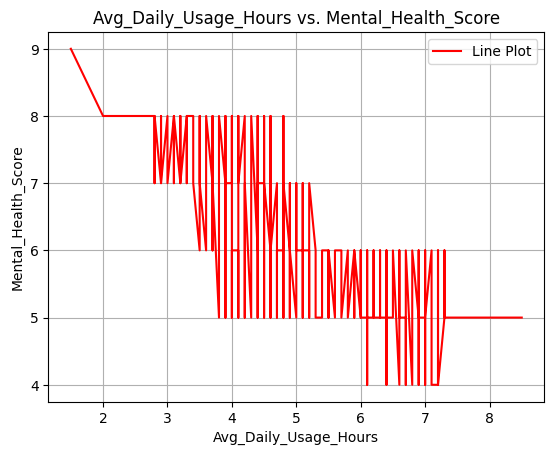

In [25]:
plt.plot(df_sorted['Avg_Daily_Usage_Hours'], df_sorted['Mental_Health_Score'], color='red',  label='Line Plot')
plt.title('Avg_Daily_Usage_Hours vs. Mental_Health_Score')
plt.xlabel('Avg_Daily_Usage_Hours')
plt.ylabel('Mental_Health_Score')
plt.grid()
plt.legend()
plt.show()

The plot shows the trend in the data which is the relationship between the __mental health__ and __average daily hours spent__ and its clear less time spent on social media is translated to high metal score. Meaning student that spend less time on social tends to be mentaly stable compared to their counter part.

To display it more visual, let use seaborn to plot similar graph

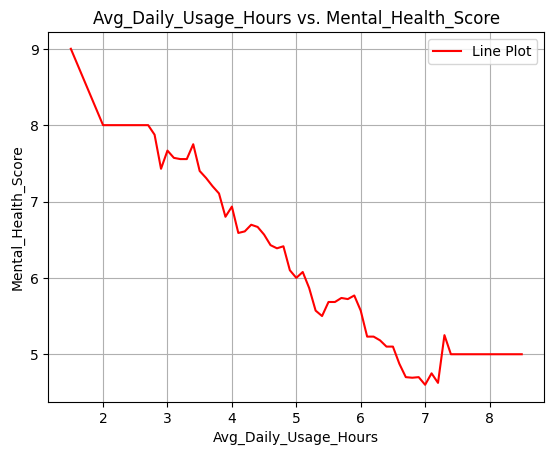

In [26]:
sns.lineplot(x='Avg_Daily_Usage_Hours', y = 'Mental_Health_Score', data= df_sorted, 
             c='red', errorbar=None, label='Line Plot')
plt.title('Avg_Daily_Usage_Hours vs. Mental_Health_Score')
plt.grid()
plt.legend()
plt.show()

__Scatter plot__

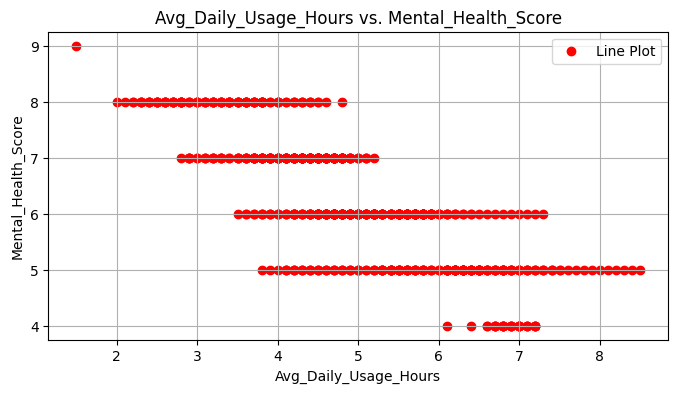

In [27]:
# Scattwer plot of Average Daily Time Users Hours vs. Sleep Hours Per Night
plt.figure(figsize=(8, 4))
plt.scatter(df_sorted['Avg_Daily_Usage_Hours'], df_sorted['Mental_Health_Score'], color='red',  label='Line Plot')
plt.title('Avg_Daily_Usage_Hours vs. Mental_Health_Score')
plt.xlabel('Avg_Daily_Usage_Hours')
plt.ylabel('Mental_Health_Score')
plt.grid()
plt.legend()
plt.show()

The scatter plot affirm there is strong correlation between the mental health and the time student spend on social media. Let determine the correlation below.

In [28]:
print(f"Correlation = {df_sorted['Avg_Daily_Usage_Hours'].corr(df_sorted['Mental_Health_Score'])}")

Correlation = -0.8010576231623432


The negative confirms that mental health and time spend on social media are inversely related, in the sense that student that spend more time on social media are at the risk of endengering their mental health status.

### __Histogram__ : Visualizing the distribution of a specific column

__Histogram of Avg_Daily_Usage_Hours__

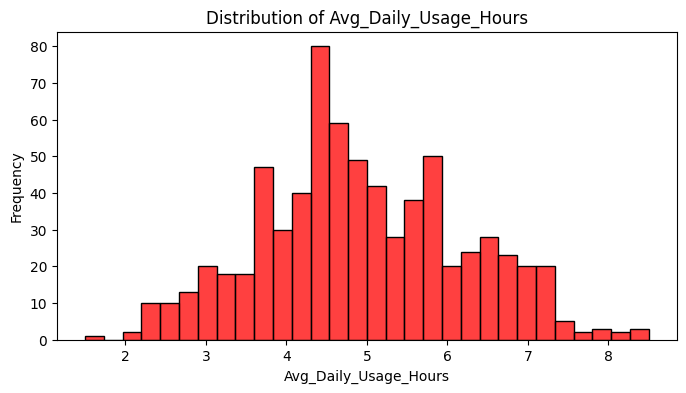

In [29]:
# Visualizing the distribution of a Avg_Daily_Usage_Hours
plt.figure(figsize=(8, 4))
sns.histplot(df_sorted['Avg_Daily_Usage_Hours'], bins=30, color='red')
plt.title('Distribution of Avg_Daily_Usage_Hours')
plt.xlabel('Avg_Daily_Usage_Hours')
plt.ylabel('Frequency')
plt.show()

__Distribution of Avg_Daily_Usage_Hours__

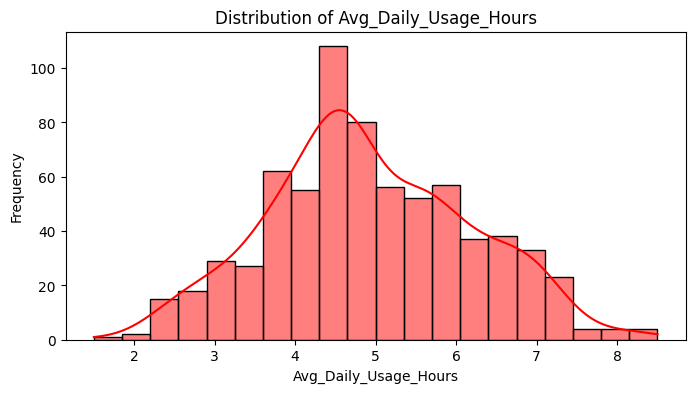

In [30]:
# To depict the nature of the distribution of Avg_Daily_Usage_Hours, set kde=True
plt.figure(figsize=(8, 4))
sns.histplot(df_sorted['Avg_Daily_Usage_Hours'], bins=20, color='red', kde=True)
plt.title('Distribution of Avg_Daily_Usage_Hours')
plt.xlabel('Avg_Daily_Usage_Hours')
plt.ylabel('Frequency')
plt.show()

The distribution is approximately a normal distribution, which means the measures of the central tendencies (mean, median and more) are almost equal. The distribution shows most of the population are clustered around the median value.

let determine the various meaasure of central tendencies to validate the point above.

In [31]:
print(f"mean = {df_sorted['Avg_Daily_Usage_Hours'].mean()}")
print(f"median = {df_sorted['Avg_Daily_Usage_Hours'].median()}")
print(f"mode = {df_sorted['Avg_Daily_Usage_Hours'].mode()}")

mean = 4.91872340425532
median = 4.8
mode = 0    4.7
Name: Avg_Daily_Usage_Hours, dtype: float64


__Mental Health Score by Academic Level__

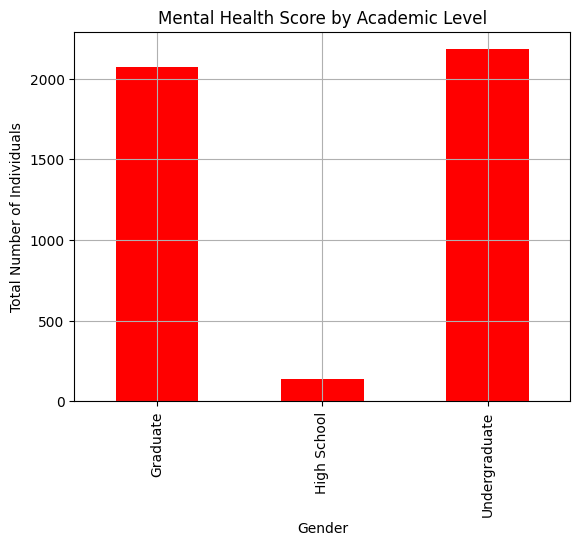

In [32]:
df.groupby('Academic_Level')['Mental_Health_Score'].sum().plot(kind='bar', color='r')
plt.title('Mental Health Score by Academic Level')
plt.xlabel('Gender')
plt.ylabel('Total Number of Individuals')
plt.grid()
plt.show()

The data shows it's mostly collected among undergraduate and graduate students. Student interviewed from high has age bracket almost similar to the undergraduate student, thus we can either drop (low frequency) or add them to the undegraduate student for better data analysis and presentation.

__Bar plot for Avg_Daily_Usage_Hours by Gender__

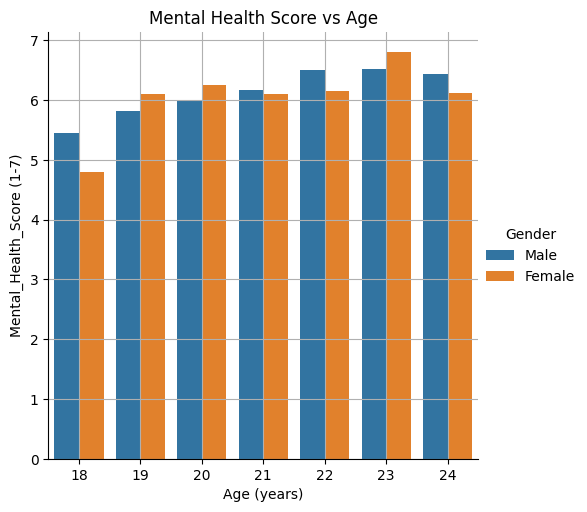

In [33]:
# Bar plot for Avg_Daily_Usage_Hours by Gender
sns.catplot(x= 'Age', y = 'Mental_Health_Score', 
            data=df_sorted,  hue='Gender', kind='bar', errorbar=None)
plt.title('Mental Health Score vs Age')
plt.xlabel('Age (years)')
plt.ylabel('Mental_Health_Score (1-7)')
plt.grid()
plt.show()

The plot base on gender across each age group shows the data collected represented each and every age group for each gender. Although the population of male student is higher, but the discripancy is not much.

__Box Plot of Avg_Daily_Usage_Hours vs. Mental_Health_Score__

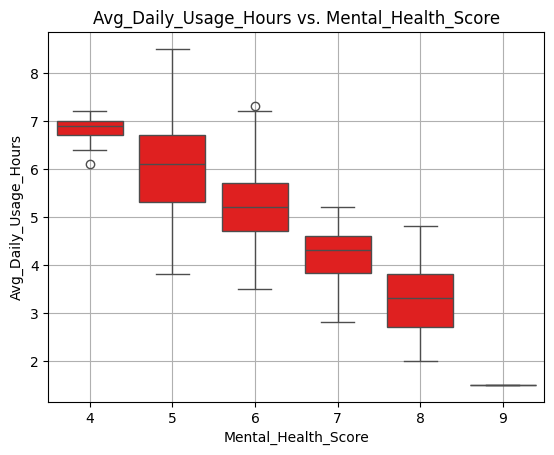

In [34]:
sns.boxplot(x='Mental_Health_Score', y = 'Avg_Daily_Usage_Hours', data = df_sorted, color='r')
plt.title("Avg_Daily_Usage_Hours vs. Mental_Health_Score")
plt.grid()
plt.show()

The median score and the different percentiles as well as the outliers.